<a href="https://colab.research.google.com/github/Tsakuwa/DeepLearning.AI-TensorFlow_Developer-specialization/blob/main/Copy_of_Tsakuwa10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#def setUpImport():
#!pip install tensorflow --upgrade  # Upgrade to the latest tensorflow version

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob
from PIL import Image
from tqdm import tqdm
# from keras.preprocessing import image  # Remove this line to avoid potential conflicts
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img  # Import from tensorflow.keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential  # Import from tensorflow.keras
from tensorflow.keras.layers import Dense,Flatten  # Import from tensorflow.keras
import tensorflow as tf
# import tensorflow as tf  # No need to import twice
import shutil
import random



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Reorganize data into subfolders based on their labels
#then use keras flow_from_dir or pytorch ImageFolder to read images with
#folder names as labels

#Sort images to subfolders first



# Dump all images into a folder and specify the path:
data_dir = os.getcwd() + "/drive/MyDrive/archive2/all_images"

# Path to destination directory where we want subfolders
dest_dir = os.getcwd() + "/drive/MyDrive/archive2/reorganized"






In [21]:
# prompt: write python code to create train and test directories in "/drive/MyDrive/archive2/reorganized"

train_dir = os.path.join(dest_dir, 'train')
test_dir = os.path.join(dest_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


In [22]:
# prompt: split the contents of '/content/drive/MyDrive/archive2/HAM10000_metadata.csv' into data frames in train and test directories

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/archive2/HAM10000_metadata.csv')

df_train, df_test = train_test_split(df, test_size=0.2)

df_train.to_csv(os.path.join(train_dir, 'metadata.csv'), index=False)
df_test.to_csv(os.path.join(test_dir, 'metadata.csv'), index=False)


In [ ]:
# prompt: extract the levels and make a list in to respective directories

# Extract unique labels (levels)
levels = df['dx'].unique()

# Create subfolders for each level in train and test directories
for level in levels:
  os.makedirs(os.path.join(train_dir, level), exist_ok=True)
  os.makedirs(os.path.join(test_dir, level), exist_ok=True)

# Move images to respective subfolders
for _, row in df_train.iterrows():
  image_id = row['image_id']
  level = row['dx']
  src_path = os.path.join(data_dir, image_id + '.jpg')
  dst_path = os.path.join(train_dir, level, image_id + '.jpg')
  shutil.copy(src_path, dst_path)

for _, row in df_test.iterrows():
  image_id = row['image_id']
  level = row['dx']
  src_path = os.path.join(data_dir, image_id + '.jpg')
  dst_path = os.path.join(test_dir, level, image_id + '.jpg')
  shutil.copy(src_path, dst_path)


In [6]:
# prompt: display the number images in each of the subfolders
levels = df['dx'].unique()
for level in levels:
  train_count = len(os.listdir(os.path.join(train_dir, level)))
  test_count = len(os.listdir(os.path.join(test_dir, level)))
  print(f"Level: {level}, Train count: {train_count}, Test count: {test_count}")


Level: bkl, Train count: 1000, Test count: 229
Level: nv, Train count: 5389, Test count: 1316
Level: df, Train count: 999, Test count: 13
Level: mel, Train count: 1000, Test count: 237
Level: vasc, Train count: 999, Test count: 28
Level: bcc, Train count: 1000, Test count: 113
Level: akiec, Train count: 1000, Test count: 67


In [ ]:
# prompt: augment the folders with small nunmber of files to make them of almost equal size
levels = df['dx'].unique()
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

target_count = 1000  # Set your desired target count for each class

for level in levels:
  level_dir = os.path.join(train_dir, level)
  image_files = os.listdir(level_dir)
  num_images = len(image_files)

  if num_images < target_count:
    num_to_generate = target_count - num_images
    for i in range(num_to_generate):
      # Choose a random image from the level directory
      image_path = os.path.join(level_dir, random.choice(image_files))
      img = load_img(image_path)
      x = img_to_array(img)
      x = x.reshape((1,) + x.shape)

      # Generate augmented images and save them
      j = 0
      for batch in datagen.flow(x, batch_size=1, save_to_dir=level_dir, save_prefix='aug', save_format='jpg'):
        j += 1
        if j >= 1:  # Generate only one augmented image per original
          break


In [7]:
# prompt: display the number images in each of the subfolders after augmentation
levels = df['dx'].unique()
for level in levels:
  train_count = len(os.listdir(os.path.join(train_dir, level)))
  test_count = len(os.listdir(os.path.join(test_dir, level)))
  print(f"Level: {level}, Train count: {train_count}, Test count: {test_count}")


Level: bkl, Train count: 1000, Test count: 229
Level: nv, Train count: 5389, Test count: 1316
Level: df, Train count: 999, Test count: 13
Level: mel, Train count: 1000, Test count: 237
Level: vasc, Train count: 999, Test count: 28
Level: bcc, Train count: 1000, Test count: 113
Level: akiec, Train count: 1000, Test count: 67


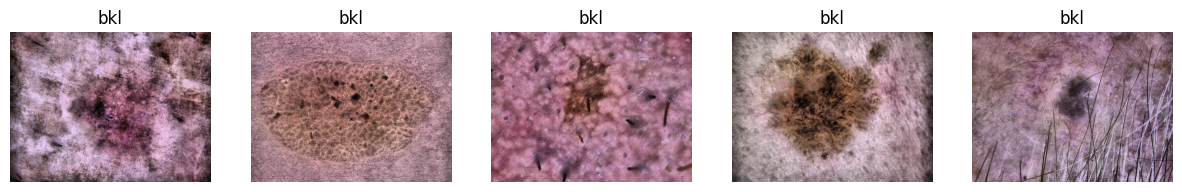

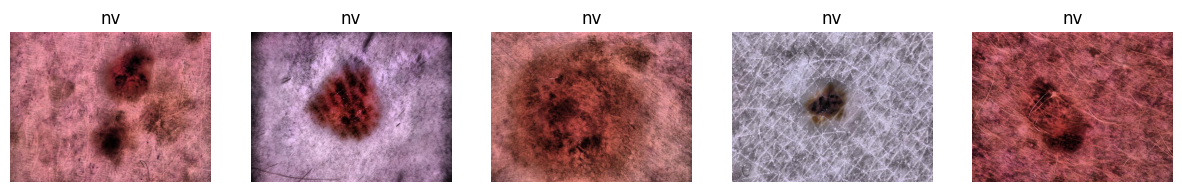

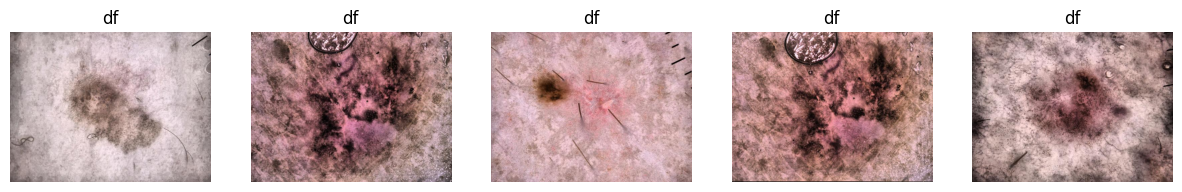

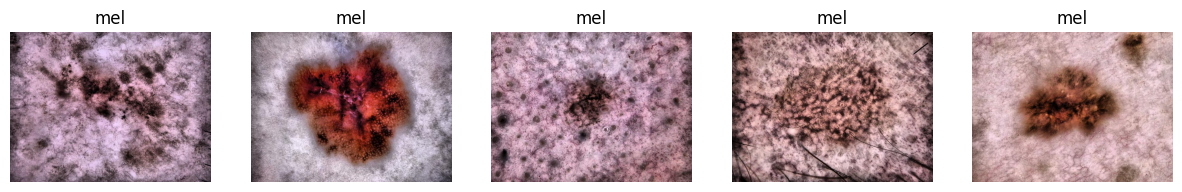

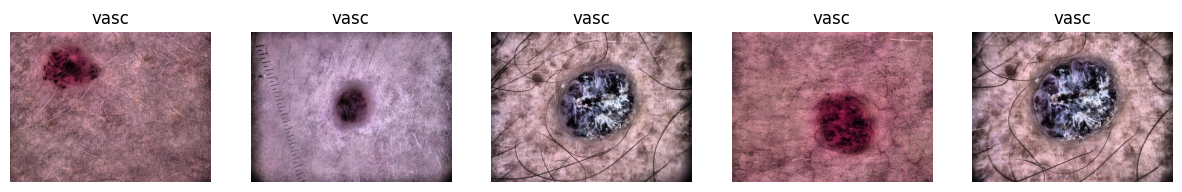

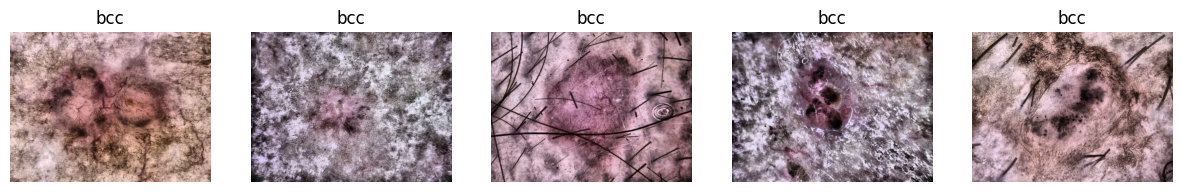

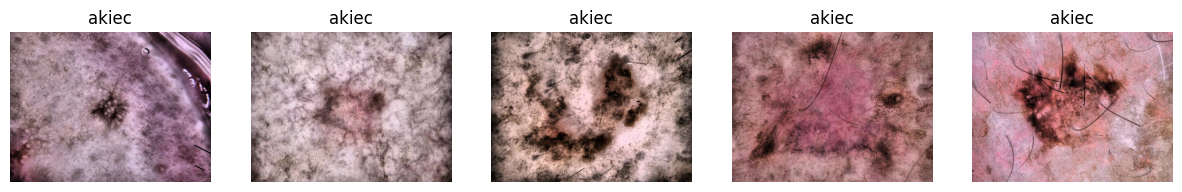

In [8]:
# prompt: display 5 images and their level from each subfolders of the dst_path

import matplotlib.pyplot as plt

# Assuming 'dest_dir' is the path to the directory containing the subfolders
for level in levels:
  level_dir = os.path.join(dest_dir, 'train', level)  # Use 'train' subdirectory for demonstration
  image_files = os.listdir(level_dir)[:5]  # Select first 5 images

  plt.figure(figsize=(15, 5))
  for i, image_file in enumerate(image_files):
    image_path = os.path.join(level_dir, image_file)
    img = plt.imread(image_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"{level}")
    plt.axis('off')
  plt.show()


In [ ]:
!pip install --upgrade scikit-image
# Upgrade scikit-image to the latest version to ensure compatibility

import numpy as np
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator from the correct module

def apply_noise_reduction(image_path):
  img = img_as_float(load_img(image_path))
  # Estimate sigma without the 'multichannel' argument
  sigma_est = np.mean(estimate_sigma(img))
  denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3, multichannel=True)
  denoise_img_as_8byte = img_as_ubyte(denoise_img)
  # Overwrite the original image with the denoised version
  Image.fromarray(denoise_img_as_8byte).save(image_path)

# Apply noise reduction to train images
# ... (Rest of your code remains the same)

In [23]:
# prompt: apply data augmentation to the images

datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

"""for level in levels:
  train_level_dir = os.path.join(train_dir, level)
  for image_file in os.listdir(train_level_dir):
    image_path = os.path.join(train_level_dir, image_file)
    img = load_img(image_path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir=train_level_dir,
                              save_prefix='augmented_',
                              save_format='jpg'):
      i += 1
      if i > 2:  # Generate 2 augmented images per original image
        break """


"for level in levels:\n  train_level_dir = os.path.join(train_dir, level)\n  for image_file in os.listdir(train_level_dir):\n    image_path = os.path.join(train_level_dir, image_file)\n    img = load_img(image_path)\n    x = img_to_array(img)\n    x = x.reshape((1,) + x.shape)\n    i = 0\n    for batch in datagen.flow(x, batch_size=1,\n                              save_to_dir=train_level_dir,\n                              save_prefix='augmented_',\n                              save_format='jpg'):\n      i += 1\n      if i > 2:  # Generate 2 augmented images per original image\n        break "

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = os.getcwd() + "/drive/MyDrive/archive2/reorganized/train"
#train_dir =  "/drive/MyDrive/archive2/reorganized"
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
#test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    target_size=(128, 128))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------


Found 11389 images belonging to 7 classes.


In [25]:

#Now we are ready to work with images in subfolders

### FOR Keras datagen ##################################
#flow_from_directory Method
#useful when the images are sorted and placed in there respective class/label folders
#identifies classes automatically from the folder name.
# create a data generator


from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Define datagen. Here we can define any transformations we want to apply to images
train_datagen = ImageDataGenerator(rotation_range=20,
                            rescale=1./255,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')







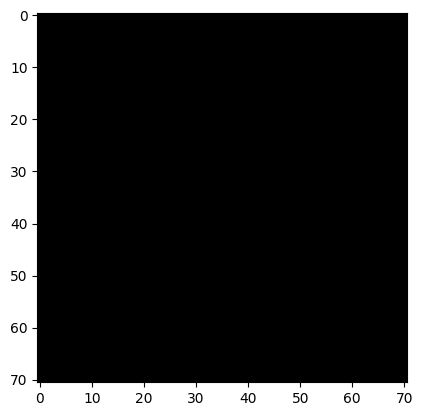

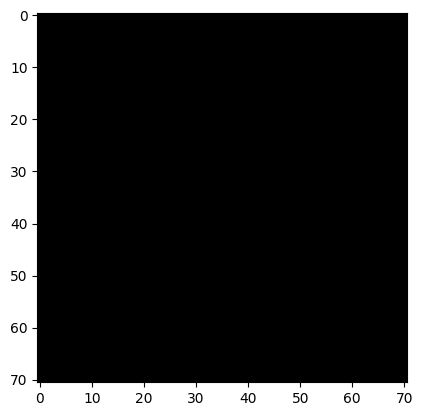

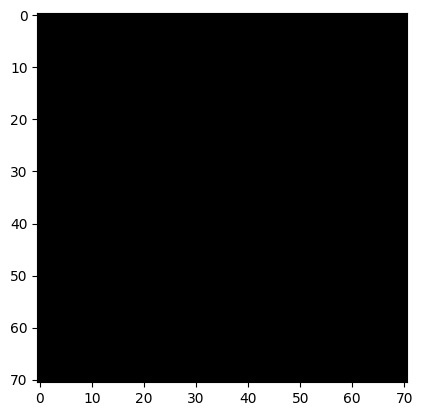

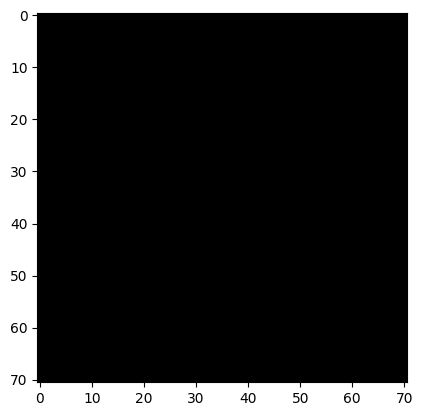

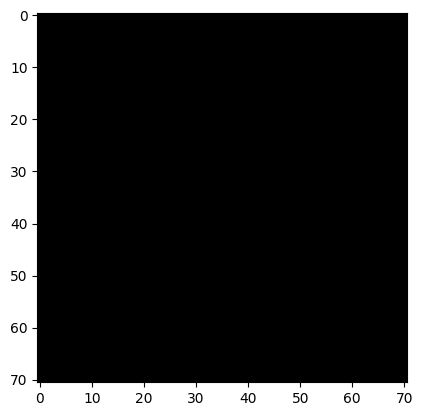

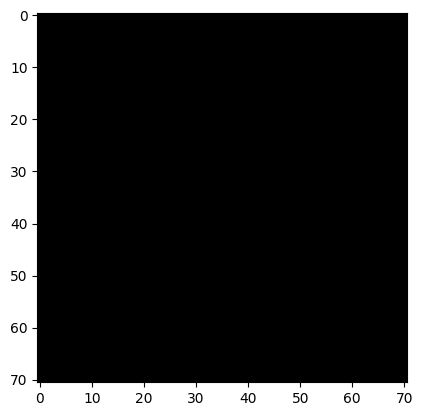

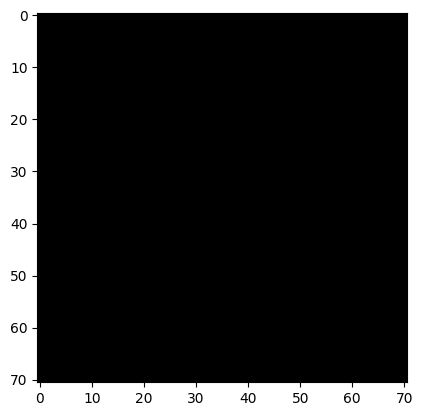

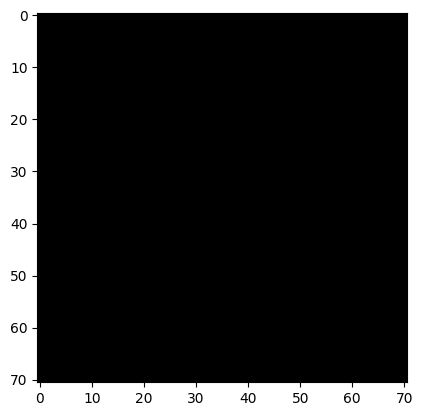

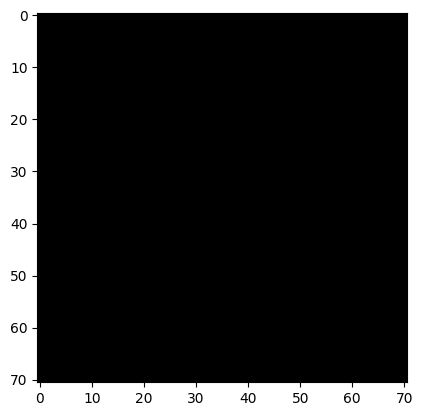

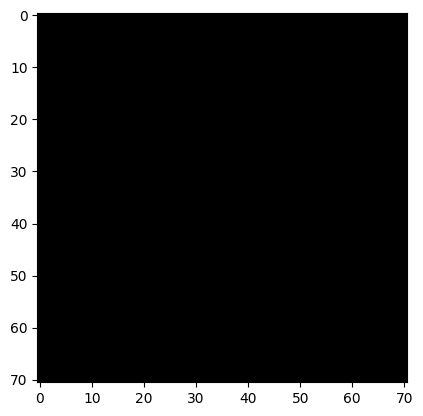

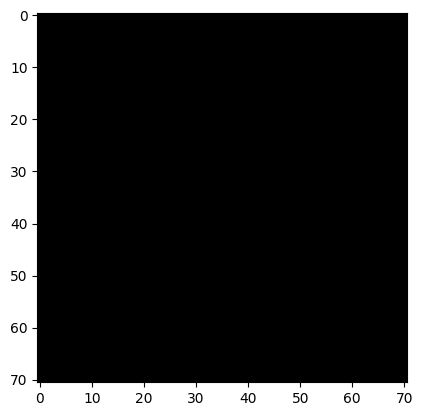

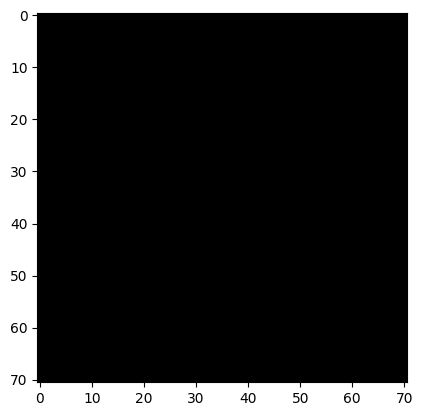

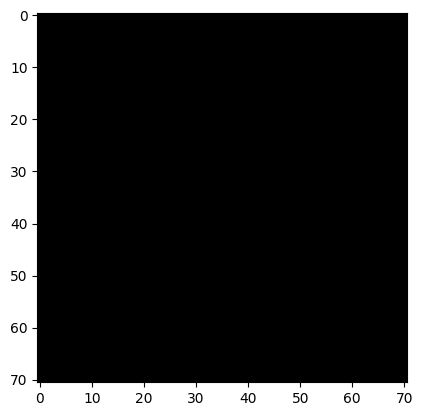

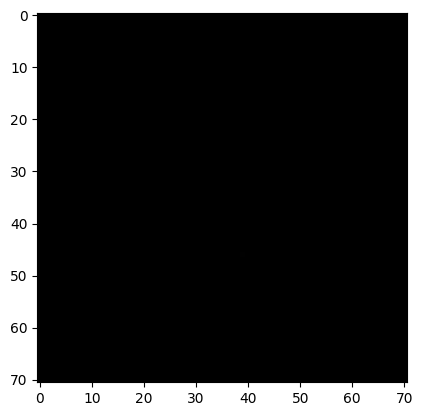

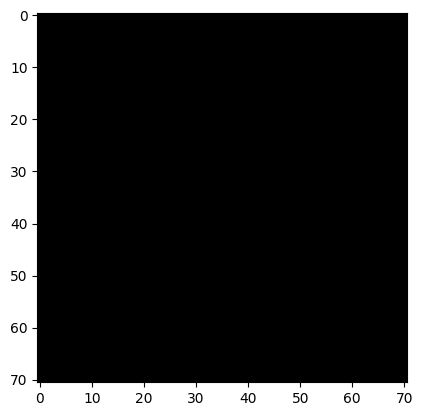

In [ ]:
#We can check images for a single batch.
x, y = next(train_generator)
#View each image
for i in range (0,15):
    image = x[i].astype(int)
    plt.imshow(image)
    plt.show()

#Now you can train via model.fit_generator

In [33]:


# prompt: build a CNN Model based on  transfer learning with Xception

from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Create the base pre-trained model
# Set the input shape to match the expected size for Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 7 classes
predictions = Dense(7, activation='softmax')(x)  # Adjust the number of classes as needed

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional Xception layers
for layer in base_model.layers:
  layer.trainable = False # Added indentation here

# Compile the model (you'll need to choose an optimizer and loss function)
# You might want to move the optimizer definition here and uncomment
# the lines below based on your original intent
#optimizer = tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG'))

#Ensure this line is indented at the same level as model.compile
model.compile(
    optimizer='adam', # Changed to a basic optimizer
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
  )

In [34]:
# prompt: modify the above model for better performance and accuracy

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

# Compile the model (you'll need to choose an optimizer and loss function)
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),  # Low learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)


Trial 1 Complete [04h 21m 41s]
val_accuracy: 0.5833333333333334

Best val_accuracy So Far: 0.5833333333333334
Total elapsed time: 04h 21m 41s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
352               |384               |units
0.1               |0.3               |dropout
0.0091156         |1.2635e-05        |learning_rate

Epoch 1/5
356/356 ━━━━━━━━━━━━━━━━━━━━ 1073s 3s/step - accuracy: 0.4722 - loss: 2.2161 - precision: 0.6330 - recall: 0.3047 - val_accuracy: 0.5312 - val_loss: 1.3407 - val_precision: 0.7143 - val_recall: 0.3125
Epoch 2/5
356/356 ━━━━━━━━━━━━━━━━━━━━ 1090s 3s/step - accuracy: 0.5664 - loss: 1.2045 - precision: 0.7721 - recall: 0.4158 - val_accuracy: 0.5625 - val_loss: 1.2227 - val_precision: 0.6667 - val_recall: 0.3125
Epoch 3/5
356/356 ━━━━━━━━━━━━━━━━━━━━ 1093s 3s/step - accuracy: 0.5586 - loss: 1.2115 - precision: 0.7693 - recall: 0.4106 - val_accuracy: 0.5000 - val_loss: 1.3532 - val_precision: 0.7059 - val_recall: 0.3750
Ep

In [35]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Path to your training data directory
    target_size=(128, 128),  # Resize images to match Xception input
    batch_size=32,  # Adjust as needed
    class_mode='categorical'  # Assuming you have multiple classes
)

# Similarly for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 11389 images belonging to 7 classes.
Found 2003 images belonging to 7 classes.


In [ ]:
# Unfreeze some layers in the base model for fine-tuning
for layer in base_model.layers[-5:]:  # Unfreeze the last 5 layers
  layer.trainable = True

# Use a learning rate scheduler to adjust the learning rate during training
def lr_scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * float(tf.math.exp(-0.1)) # Convert the tensor to a float

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Use early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Retrain the model with fine-tuning, learning rate scheduling, and early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 16,
    epochs=20,  # Increase the number of epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // 16,
    callbacks=[lr_callback, early_stopping]
)

# Evaluate the model
loss, accuracy, precision, recall = best_model.evaluate(train_generator)
f1_score = 2 * (precision * recall) / (precision + recall)
print("Loss:", loss)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Epoch 1/20
261/711 [==========>...................] - ETA: 2:42 - loss: 1.3141 - accuracy: 0.5469 - precision_6: 0.7279 - recall_6: 0.3507

In [ ]:
# save pipe.pkl to output data folder
!cp pipe.pkl /content/drive/MyDrive/copyOutput